# Cross validation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

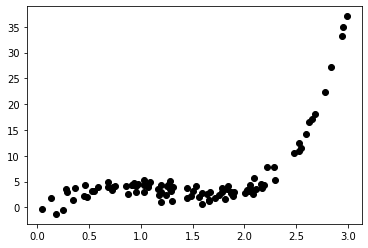

In [3]:
np.random.seed(123)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)
plt.plot(x, y, 'ok');
plt.show()

# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [4]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
# models.append(('PR4', # ))
# models.append(('PR5', # ))
# models.append(('PR6', # ))
# models.append(('PR7', # ))

results = []
names = []


In [5]:
seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [ ]:
for name, model in models:
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt>. 

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=True)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(x, y)
grid.best_params_

In [ ]:
grid.best_estimator_.predict(x)

# Zadanie 
Dla danych reklamowych, obejmujących sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [6]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


LR: -1.302250 (0.291568)
PR2: -0.441327 (0.119563)
PR3: -0.358775 (0.086618)
PR4: -0.538251 (0.467361)
PR5: -0.737391 (0.479321)
PR6: -2.607728 (2.672848)
PR7: -9.796907 (16.644317)


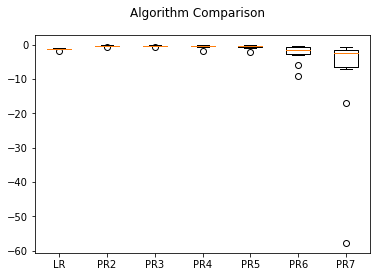

In [14]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR7', make_pipeline(PolynomialFeatures(7), linear_model.LinearRegression()) ))

# evaluate each model in turn
results = []
names = []

seed=123
kfold = model_selection.KFold(n_splits=10)
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

for name, model in models:
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [8]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
from sklearn.model_selection import GridSearchCV
seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=True)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(X, y)
grid.best_params_

{'polynomialfeatures__degree': 3}

In [10]:
from sklearn import  metrics
metrics.r2_score(grid.best_estimator_.predict(X) , y )

0.9920121396179639

In [11]:
X.iloc[1,]

TV           44.5
radio        39.3
newspaper    45.1
Name: 2, dtype: float64

In [12]:
grid.best_estimator_.predict(X.iloc[1:2,:])

array([10.76944735])

In [13]:
from sklearn import  metrics
metrics.mean_squared_error(grid.best_estimator_.predict(X) , y )

0.21464260426216356